## Multi Model Classification using Deep Learning

Reuters dataset has 46 labelled classes, which is used to create a multi model classification neural network model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import reuters
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('Train data size: {}, Test data size: {}'.format(len(train_data), len(test_data)))

2113536/2110848 [==============================] - 0s 0us/step
Train data size: 8982, Test data size: 2246


In [9]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

PreProcess data

In [17]:
def vectorize(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

train_data_encoded = vectorize(train_data)
train_labels_encoded = vectorize(train_labels, dimension=46)
X_test = vectorize(test_data)
y_test = vectorize(test_labels, dimension=46)

X_train, X_val, y_train, y_val = train_test_split(train_data_encoded, train_labels_encoded, test_size=0.2, random_state=0)

Build a Sequential Neural Network

In [16]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(46, activation='softmax'))
  return model

model = build_model()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
15/15 [==============================] - 1s 52ms/step - loss: 2.7299 - accuracy: 0.4963 - val_loss: 1.8143 - val_accuracy: 0.6505
Epoch 2/20
15/15 [==============================] - 1s 41ms/step - loss: 1.4619 - accuracy: 0.7066 - val_loss: 1.3790 - val_accuracy: 0.7006
Epoch 3/20
15/15 [==============================] - 1s 41ms/step - loss: 1.0790 - accuracy: 0.7755 - val_loss: 1.1997 - val_accuracy: 0.7373
Epoch 4/20
15/15 [==============================] - 1s 41ms/step - loss: 0.8675 - accuracy: 0.8154 - val_loss: 1.1049 - val_accuracy: 0.7518
Epoch 5/20
15/15 [==============================] - 1s 41ms/step - loss: 0.7032 - accuracy: 0.8498 - val_loss: 1.0584 - val_accuracy: 0.7724
Epoch 6/20
15/15 [==============================] - 1s 41ms/step - loss: 0.5715 - accuracy: 0.8803 - val_loss: 0.9994 - val_accuracy: 0.7919
Epoch 7/20
15/15 [==============================] - 1s 41ms/step - loss: 0.4650 - accuracy: 0.9037 - val_loss: 0.9796 - val_accuracy: 0.7835
Epoch 8/20
15

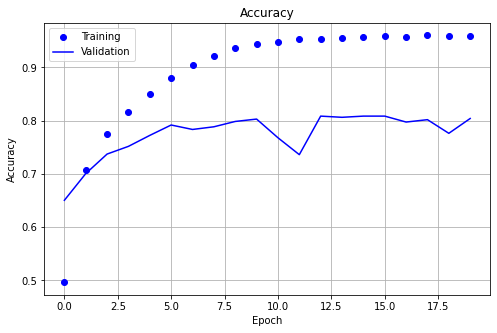

In [25]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
ax = range(0, len(acc))
c
plt.plot(ax, acc, 'bo', label='Training')
plt.plot(ax, val_acc, 'b', label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

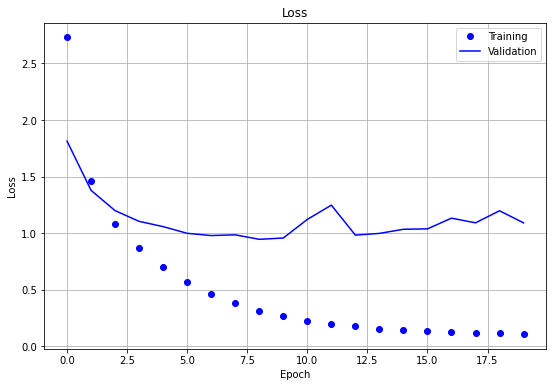

In [28]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
ax = range(0, len(acc))
plt.figure(figsize=(9,6))
plt.plot(ax, loss, 'bo', label='Training')
plt.plot(ax, val_loss, 'b', label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

Epoch 9 performs better here

In [31]:
model.fit(X_train, y_train, epochs=9, batch_size=512, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/9
15/15 [==============================] - 1s 44ms/step - loss: 0.1079 - accuracy: 0.9595 - val_loss: 1.1549 - val_accuracy: 0.8036
Epoch 2/9
15/15 [==============================] - 1s 41ms/step - loss: 0.1028 - accuracy: 0.9624 - val_loss: 1.1399 - val_accuracy: 0.8069
Epoch 3/9
15/15 [==============================] - 1s 41ms/step - loss: 0.1009 - accuracy: 0.9596 - val_loss: 1.2691 - val_accuracy: 0.7896
Epoch 4/9
15/15 [==============================] - 1s 41ms/step - loss: 0.1011 - accuracy: 0.9626 - val_loss: 1.1610 - val_accuracy: 0.8013
Epoch 5/9
15/15 [==============================] - 1s 40ms/step - loss: 0.0982 - accuracy: 0.9619 - val_loss: 1.2557 - val_accuracy: 0.7930
Epoch 6/9
15/15 [==============================] - 1s 41ms/step - loss: 0.0982 - accuracy: 0.9596 - val_loss: 1.3671 - val_accuracy: 0.7835
Epoch 7/9
15/15 [==============================] - 1s 41ms/step - loss: 0.0936 - accuracy: 0.9613 - val_loss: 1.2549 - val_accuracy: 0.8041
Epoch 8/9
15/15 [===

[1.3271067142486572, 0.7845057845115662]

This model has produced 78% accuracy while evaluated using the test data

There is still room for improvements
